# Elementos del Aprendizaje Estadístico (Libro):

## Gráfica 2.5: _Desvelando al oráculo_

Usando las librerías **numpy** y **pyplot** de _Python_, escribimos una solución para generar el tipo de  gráficas como la de la figura  2.5 del libro  __[Elementos del Aprendizaje Estadístico II](https://web.stanford.edu/~hastie/ElemStatLearn/)__ 

# Introducción 
El libro __[Elementos del Aprendizaje Estadístico II](https://web.stanford.edu/~hastie/ElemStatLearn/)__ (ESLII) es una referencia casi obligada en el estudio de los temas del aprendizaje de maquinas. Los autores suponen cierta familiarización con la notación y los  métodos empleados en estadística. Esto puede generar confusión al momento de intentar resolver los ejercicios del libro. En el internet excelentes existen manuales de soluciones (por ejemplo, [aquí](https://github.com/tuanavu/TEOSL) y [aquí](https://getd.libs.uga.edu/pdfs/ma_james_c_201412_ms.pdf) ) y que son de gran ayuda. A manera de complemento extra, aquí ofrecemos una manera de generar la gráfica 2.5 (_página 21_)

# El Problema

Queremos poder generar el siguiente tipo de gráfica

![](images/answer.png)

Esta gráfica ha sido generada con el mismo algoritmo que aparece en el libro (_página 16_).

_Descripcion del Algoritmo_

Tenemos un conjunto de puntos rojos y un conjunto  de puntos verdes (los que aparecen como puntos no rellenos). Los dos conjuntos son generados con el mismo algoritmo excepto que difieren por el parametro de entrada: un vector dos dimensional al que llamamos $promedio$. En el caso del conjunto rojo  $promedio =[0,1]$, mientras que en el caso verde $promedio =[1,0]$. Una notación estandar para la distribución normal multivariada es $N(promedio,cov)$, donde $promedio$ es el vector de promedios y  $cov$ es la matriz de covarianza. Aqui nos restringimos al caso dos-dimensional (la distribución bivariada). El algoritmo del ejercicio nos dice que debemos generar:

1) Un vector de dimensión diez, tomando números aleatorios de la distritución normál bivariada $N(promedio,\mathbb{I})$, donde $\mathbb{I}$ es la matriz identidad de $2 \times 2$. Lo llamamos _observaciones_.

2) Un vector de dimensión  cien, tomando números aleatorios del cero al nueve y con igual distribución de probabilidad (o sea 1/10). Lo nombramos como   _muestra_\__aleatoria_.

3) El conjunto de puntos con la distribución bivariada $N(m_{k},\mathbb{I}/5)$, $k=1,2,\dots,100$, donde cada $m_{k} $ se escoge como la posición _observaciones\[muestra_\__aleatoria_ _\[m\]\]_

# Solución

Nuestra estrategia de resolución consiste en primero dibujar los puntos no rellenos, despues dibujar la red igualmente espaciada para finalmente delinear la frontera.

Primero cargamos el generador de números aleatorios de la distribucion multivariada que esta en la biblioteca **numpy**

In [43]:
import numpy as np

#escribimos multivariate_normal como m_n

from numpy.random import multivariate_normal as m_n

***
##  Puntos Aleatorios 

Con las especificaciones del problema escribimos la función _genera_\__puntos()_ que a partir de un vector de promedios nos da como salida los vectores:
    
1) _observaciones_,

2) _muestra_\__aleatoria_,

3) _puntos_,

tal y como se describen en el enunciado del problema.

In [44]:
#Matriz identidad de dos dimensiones
id2 = np.array([[1,0],[0,1]])


def genera_puntos(promedio):
    
    observaciones =  m_n(promedio,id2,10)
    muestra_aleatoria =  np.random.choice(10,100) 
    
    #iteramos cien veces
    puntos = np.array([m_n(observaciones[m],(id2/5),1)[0] for m in muestra_aleatoria])
   
    return muestra_aleatoria,observaciones,puntos  

Con esta rutina, generamos los puntos no rellenos. A la clase de puntos que se generan con el promedio $mean =[0,1]$ los identificamos con  la etiqueta 'verde', mientras que a la clase con promedio $mean = [1,0]$ le ponemos la etiqueta 'rojo':

In [45]:
#Creamos clases para cada una de las salidas de genera_puntos()
observaciones = {}
muestra_aleatoria = {}
puntos = {}

muestra_aleatoria['verde'],observaciones['verde'],puntos['verde'] = genera_puntos([0,1])

muestra_aleatoria['rojo'],observaciones['rojo'],puntos['rojo'] = genera_puntos([1,0])

Estamos  en una posición de generar la gráfica de puntos aleatorios, para ello utilizamos la sub-biblioteca **pyplot** de **matplotlib**. Separamos cada una de las coordenadas y despues graficamos

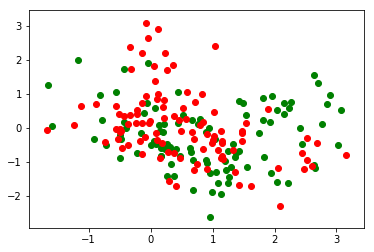

In [46]:
import matplotlib.pyplot as plt

xv,yv  =  puntos['verde'].T
xr,yr  =  puntos['rojo'].T

plt.scatter(xv,yv ,c='green')
plt.scatter(xr,yr, c='red')

plt.show()


***
### Distribución de Probabilidad

Habiendo generado los puntos aleatorios, toca el turno de generar la red puntos igualmente espaciada y la fronteras que los separa. Para ello hacemos uso del  _clasificador de Bayes_ como criterio de selección de color de cada uno de los puntos de la red.

Si la red estuviese construída exclusivamente con puros puntos _rojos_, la densidad de probabilidad asignada a cualquier vector dos-dimensional $z$ vendría dada por 

$P_{rojo}(z) = \frac{1}{100} \frac{5}{2\pi }\left( e^{\frac{5}{2}\vert z-obs_{1} \vert^2} + e^{\frac{5}{2}\vert z-obs_{2} \vert^2} +\dots +e^{\frac{5}{2}\vert z-obs_{99} \vert^2}  + e^{\frac{5}{2}\vert z-obs_{100} \vert^2}\right)$

donde $z =(x,y)$ y $\vert z\vert^2 = x^2 + y^2$. Aquí los $obs_{i}$, $i=1,2,\dots, 100$, son vectores de dimensión dos y son  los elementos del  vector

_observaciones\['rojo'\]\[muestra_\__aleatoria_ _\[m\]\]_ ,  $m =1,2,...,100$.

Este vector lo obtuvimos con anterioridad y  por construcción se obtienen de a lo más diez valores distintos (los elementos de _observaciones\['rojo'\]_).

 Esto nos dice que $P_{r}(z)$ puede ser reescrita como:

$P_{r}(z) = \frac{1}{100}\frac{5}{2\pi } \left(f_{1} e^{\frac{5}{2}\vert z-d_{1} \vert^2} + f_{2} e^{\frac{5}{2}\vert z-d_{2} \vert^2} +\dots +f_{9}e^{\frac{5}{2}\vert z-d_{9} \vert^2}  + f_{10}e^{\frac{5}{2}\vert z-d_{10} \vert^2}\right) $

donde  $f_{1},f_{2},\dots, f_{10} $ representan las frecuencias  de $d_{1},d_{2},\dots, d_{10} $, que a su vez representan a los elementos de _observaciones\['rojo'\]_


Consideraciones similares aplican para $P_{verde}(z)$, el caso 'verde'. Calculamos las frecuencias para ambos casos:


In [47]:
#Nuestro almacén de frecuencias
frecuencias = {}

#Nos ayudamos del metodo unique() de numpy
u_b, frecuencias['verde'] = np.unique(muestra_aleatoria['verde'], return_counts=True)
u_o, frecuencias['rojo'] = np.unique(muestra_aleatoria['rojo'], return_counts=True)

Para dos vectores $z$ y $z'$ en el plano, definimos la funcion $exp[\frac{5}{2}\vert z-z' \vert^2]$:

In [48]:
def normal(x,y):
    arg = np.array(x) - np.array(y)
    arg = - 5 *  np.dot(arg,arg)/2
    return np.exp(arg)

Teniendo las frecuencias y las funciones exponenciales, podemos generar la función de distribución de probabilidad $P_{color}(z)$:

In [49]:
def probabilidad(color,point):
    
    # Arreglo de las diferentes distribuciones de probabilidad
    array_exp = np.array([normal(obs,point) for obs in observaciones[color]])
    
    return np.dot(frecuencias[color],array_exp)  

Notemos que no hemos introducido el factor de $(1/100)(5/2\pi)$ (no será necesario). Para generar la suma final en _probabilidad()_, hemos usado la función de producto punto _dot()_ de **numpy**
*** 
### El clasificador de Bayes

Teniendo la distribución para cada color determinamos escoger  _el color verde en cada punto de la red si_ $P_{verde}(z) > P_{rojo}(z)$ _y viceversa_. Este es el criterio de clasificación de Bayes. El conjunto de puntos donde $P_{verde}(z) = P_{rojo}(z)$ forman nuestra _frontera_
***
Para el punto $z = (x,y)$, la siguiente función nos da el color de acuerdo a la clasificacion de Bayes:

In [50]:
def bayes(x,y):  
    
    color  = 'green' if probabilidad('verde',[x,y]) > probabilidad('rojo',[x,y]) else 'red'        

    return color 

# Extendemos el dominio de definicion de bayes()
v_bayes = np.vectorize(bayes)

Hemos introducido _v_\__bayes_ mediante el método _vectorize_ de **numpy**, este método nos permite iterar sobre arreglos, por lo que _v_\__bayes_ clasifica  matrices de puntos.

## Red de colores

Formamos la red mediante un arreglo rectangular y donde las esquinas del rectangulo que envuelve la red se escogen de la siguiente manera:

1) _Aristas Verticales Izquierdo y Derecho:_  El menor y el mayor de todas las coordenadas $x$ (absisa)

2) _Aristas Verticales Inferior y Superior:_  El menor y el mayor de todas las coordenadas $y$ (ordenada)


***


Especificando el número de nodos de la red, la siguiente función nos entrega la longitud 
de las aristas del rectangulo de red, dividos en partes iguales:

In [51]:

#Concatenamos todos los puntos aleatorios
xvr,yvr = np.concatenate((xv,xr)), np.concatenate((yv,yr))

#Los aristas de la red

xmin,xmax = np.amin(xvr),np.amax(xvr)
ymin,ymax = np.amin(yvr),np.amax(yvr)

#Dividimos un intervalo en n intervalos iguales

def intervalos(n):
    
    X = np.linspace(xmin,xmax,n+1)
    Y = np.linspace(ymin,ymax,n+1)
    
    return X,Y    

Generamos la red con el método _meshgrid_ de **numpy**. Despues utilizamos el generador de grafica de puntos _scatter()_ de **pyplot**. En los argumentos de este ultimo método, usamos _v_\__bayes()_ para especificar el color de los puntos

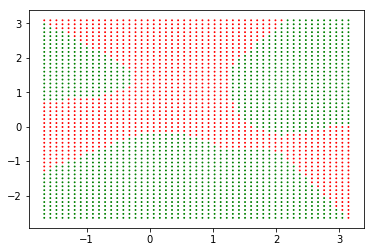

In [52]:
X, Y  = intervalos(50)

#La red
XX, YY  = np.meshgrid(X,Y)


plt.scatter(XX,YY, c=v_bayes(XX,YY).flatten(), s =0.8)
plt.show()

## Las fronteras 

Toca el turno de definir las fronteras. Nuestra estragia consiste en ver en cada punto si los vecinos de arriba y de la derecha han cambiado de color (no es necesario ver a los vecinos de abajo y de la izquierda porque la red se recorre en las direcciones crecientes de los ejes). Veremos que para tener un gráfico aceptable, necesitaremos más resolución que la de la red original, por lo que envolvemos el codigo en una función que tiene como parametro de entrada la partición de red. 

In [57]:
## Las fronteras 

In [53]:
def gen_curva(intervalos):
                    
    curveX, curveY = [],[]      
    
    X = np.linspace(xmin,xmax,intervalos+1)
    Y = np.linspace(ymin,ymax,intervalos+1)
    
    XX, YY  = np.meshgrid(X,Y)
    
    colores = v_bayes(XX,YY)
           
    pasos = np.arange(X.size-1)
    
    for i in pasos:
        for j in pasos:        
            
            center = colores[j][i]
            up = colores[j][i+1]
            right = colores[j+1][i]
            
            if up != center or right != center:

                curveX.append(X[i])
                curveY.append(Y[j])  

    return curveX,curveY      

Graficamos la correspondiente curva con una red de 50 puntos en cada arista:

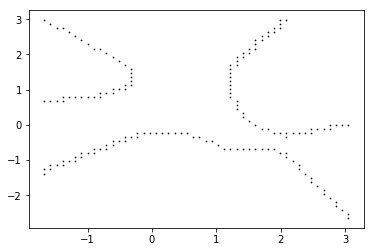

In [54]:
curveX,curveY = gen_curva(50)
plt.scatter(curveX,curveY,s=0.5, c ='black')
plt.show()

Como vemos la resolución es muy pobre. Por lo que aumentamos la resolución. 

In [55]:
curveX,curveY = gen_curva(400)

### La gráfica final 
Finalmente, juntamos todas las gráficas que hemos obtenido en una misma

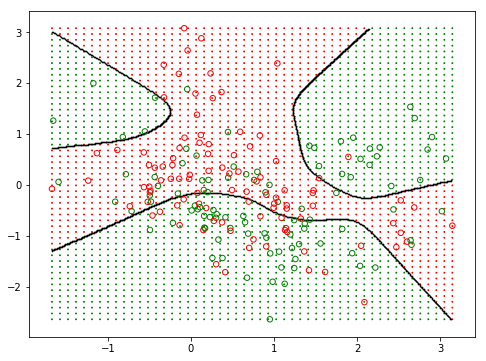

In [56]:
#Resolución de la red: 50 
#Resolución de la frontera: 300

plt.figure(figsize=(8, 6))

plt.scatter(XX,YY, s =0.8, c=v_bayes(XX,YY).flatten())
plt.scatter(curveX,curveY,s=0.45, c ='black')


plt.scatter(xv,yv,s=30,facecolors='none', edgecolors='green')
plt.scatter(xr,yr,s=30,facecolors='none', edgecolors='red')


plt.show()

## Conclusiones
***
Hemos generado la forma de la  gráfica aparece en la figura 2.5 del libro ESLII.
 Hemos usado gráficas de dispersión para generar las fronteras, 
también podría usarse el método _plot()_ de **pyplot**, 
pero requeriríamos antes, introducir una función que ordene los puntos de la frontera.
******
***
